In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_humanfreedom = pd.read_csv('/Users/ir3n3br4t515/Desktop/hfi_cc_2018.csv')
df_interestrates = pd.read_csv('/Users/ir3n3br4t515/Desktop/index.csv')

#econ_data.set_index(econ_data['DATE'], inplace=True)
#del econ_data['DATE']

#Annualize our unemployment delta by multiplying by 4 (a crude but sufficient method for here)
#econ_data['Unemployment_chg'] = econ_data.Unemployment.diff()*4
#econ_data.dropna(inplace=True)



In [3]:
df_interestrates.head()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN


In [4]:
df_interestrates.isnull().sum()


Year                              0
Month                             0
Day                               0
Federal Funds Target Rate       442
Federal Funds Upper Target      801
Federal Funds Lower Target      801
Effective Federal Funds Rate    152
Real GDP (Percent Change)       654
Unemployment Rate               152
Inflation Rate                  194
dtype: int64

In [5]:
inspect_inflation = df_interestrates.groupby('Year')['Inflation Rate'].mean().to_frame().reset_index()
inspect_inflation.columns = ['Year', 'Mean_inflation']

inspect_inflation.head()

,Year,Mean_inflation
0,1954,NaN
1,1955,NaN
2,1956,NaN
3,1957,NaN
4,1958,2.283333


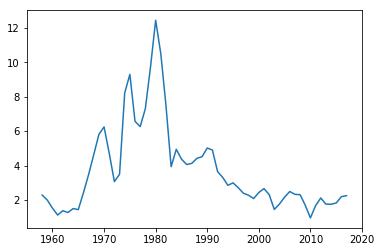

In [6]:
plt.plot(inspect_inflation['Year'], inspect_inflation['Mean_inflation'])

In [7]:
df_interestrates.loc[df_interestrates['Year'] < 1958, 'Inflation Rate'] = 3.00


In [8]:
#am i doing anything with human freedom? df_humanfreedom_US = (df_humanfreedom ['ISO_code'] == 'USA')
df_interestrates.head()


,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,3.0
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,3.0
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,3.0
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,3.0
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,3.0


In [9]:
for col in df_interestrates.columns: 
    print(col) 

Year
Month
Day
Federal Funds Target Rate
Federal Funds Upper Target
Federal Funds Lower Target
Effective Federal Funds Rate
Real GDP (Percent Change)
Unemployment Rate
Inflation Rate


In [10]:
df_interestrates.columns = df_interestrates.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [11]:
for col in df_interestrates.columns: 
    print(col) 

year
month
day
federal_funds_target_rate
federal_funds_upper_target
federal_funds_lower_target
effective_federal_funds_rate
real_gdp_percent_change
unemployment_rate
inflation_rate


In [19]:
df_interestrates.isnull().sum()


year                              0
month                             0
day                               0
federal_funds_target_rate       442
federal_funds_upper_target      801
federal_funds_lower_target      801
effective_federal_funds_rate    152
real_gdp_percent_change         654
unemployment_rate               152
inflation_rate                  152
dtype: int64

In [20]:
df_interestrates.fillna(df_interestrates.mean(), inplace=True)

In [21]:
df_interestrates.isnull().sum()


year                            0
month                           0
day                             0
federal_funds_target_rate       0
federal_funds_upper_target      0
federal_funds_lower_target      0
effective_federal_funds_rate    0
real_gdp_percent_change         0
unemployment_rate               0
inflation_rate                  0
dtype: int64

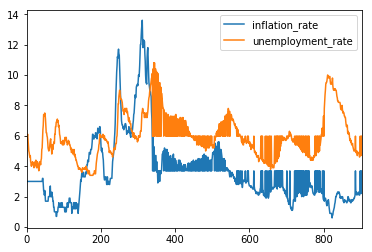

In [30]:
df_interestrates[['inflation_rate', 'unemployment_rate']].plot()
plt.show()

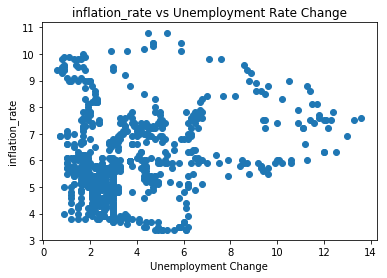

In [31]:
plt.scatter(x = df_interestrates.inflation_rate, y = df_interestrates.unemployment_rate)
plt.title('inflation_rate vs Unemployment Rate Change')
plt.xlabel('Unemployment Change')
plt.ylabel('inflation_rate')
plt.show()

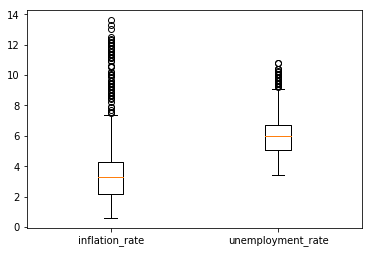

In [32]:
plt.boxplot([df_interestrates.inflation_rate, df_interestrates.unemployment_rate])
plt.xticks([1,2], ['inflation_rate','unemployment_rate'])
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X = df_interestrates[['inflation_rate']]
y = df_interestrates['unemployment_rate']

lm.fit(X,y)
print('coefficients: ' + str(lm.coef_))
print('intercept: ' + str(lm.intercept_))
print('score: ' + str(lm.score(X,y)))

coefficients: [0.13463391]
intercept: 5.481997371848362
score: 0.04633235421522752


In [33]:
from sklearn.linear_model import HuberRegressor
hr = HuberRegressor()

hr.fit(X,y)
print('coefficients: ' + str(hr.coef_))
print('intercept: ' + str(hr.intercept_))
print('score: ' + str(hr.score(X,y)))

coefficients: [0.17403017]
intercept: 5.184130284302914
score: 0.03098880858234976


In [39]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(fit_intercept = False) 
ridgeregr.fit(X, y)

print('coefficients: ' + str(ridgeregr.coef_))
print('intercept: ' + str(ridgeregr.intercept_))
print('score: ' + str(ridgeregr.score(X,y)))

coefficients: [1.20826365]
intercept: 0.0
score: -4.028280706889783


In [40]:
from sklearn.linear_model import Lasso

lassoregr = Lasso() 
lassoregr.fit(X, y)

print('coefficients: ' + str(lassoregr.coef_))
print('intercept: ' + str(lassoregr.intercept_))
print('score: ' + str(hr.score(X,y)))

coefficients: [0.]
intercept: 5.979122340425532
score: 0.03098880858234976


In [41]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet() 
elasticregr.fit(X, y)

print('coefficients: ' + str(elasticregr.coef_))
print('intercept: ' + str(elasticregr.intercept_))
print('score: ' + str(elasticregr.score(X,y)))

coefficients: [0.03542551]
intercept: 5.848316471474023
score: 0.0211745727102276


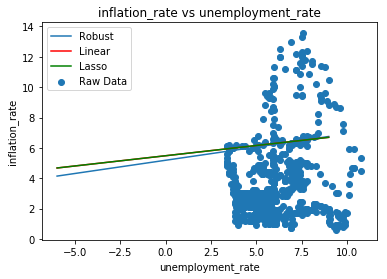

In [43]:
robust = [hr.coef_[0] * i + hr.intercept_ for i in range(-6, 10)]
linear = [lm.coef_[0] * i + lm.intercept_ for i in range(-6, 10)]
lasso = [lassoregr.coef_[0] * i + lassoregr.intercept_ for i in range(-6, 10)]


plt.scatter(x = df_interestrates.unemployment_rate, y = df_interestrates.inflation_rate, label='Raw Data')
plt.plot(range(-6,10), robust, label='Robust')
plt.plot(range(-6,10), linear, 'r', label='Linear')
plt.plot(range(-6,10), linear, 'g', label='Lasso')
plt.legend()
plt.title('inflation_rate vs unemployment_rate')
plt.xlabel('unemployment_rate')
plt.ylabel('inflation_rate')
plt.show()

Inference: It looks like Unemployment follows inflation. That is, there seeems to be a strong correlation between Unemployment and drag of 6-12 months of Inflation¶